# Data preparation & exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
data=pd.read_csv(r"C:\Users\Microsoft\Downloads\exchange_rate.csv")
data

date   Ex_rate
0       1/1/1990 0:00  0.785500
1       2/1/1990 0:00  0.781800
2       3/1/1990 0:00  0.786700
3       4/1/1990 0:00  0.786000
4       5/1/1990 0:00  0.784900
...               ...       ...
7583   6/10/2010 0:00  0.718494
7584   7/10/2010 0:00  0.721839
7585   8/10/2010 0:00  0.723197
7586   9/10/2010 0:00  0.720825
7587  10/10/2010 0:00  0.720825

[7588 rows x 2 columns]

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [3]:
data.describe()

Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536

In [4]:
data.shape

(7588, 2)

In [5]:
data.drop_duplicates()

date   Ex_rate
0       1/1/1990 0:00  0.785500
1       2/1/1990 0:00  0.781800
2       3/1/1990 0:00  0.786700
3       4/1/1990 0:00  0.786000
4       5/1/1990 0:00  0.784900
...               ...       ...
7583   6/10/2010 0:00  0.718494
7584   7/10/2010 0:00  0.721839
7585   8/10/2010 0:00  0.723197
7586   9/10/2010 0:00  0.720825
7587  10/10/2010 0:00  0.720825

[7588 rows x 2 columns]

In [15]:
#missing values
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

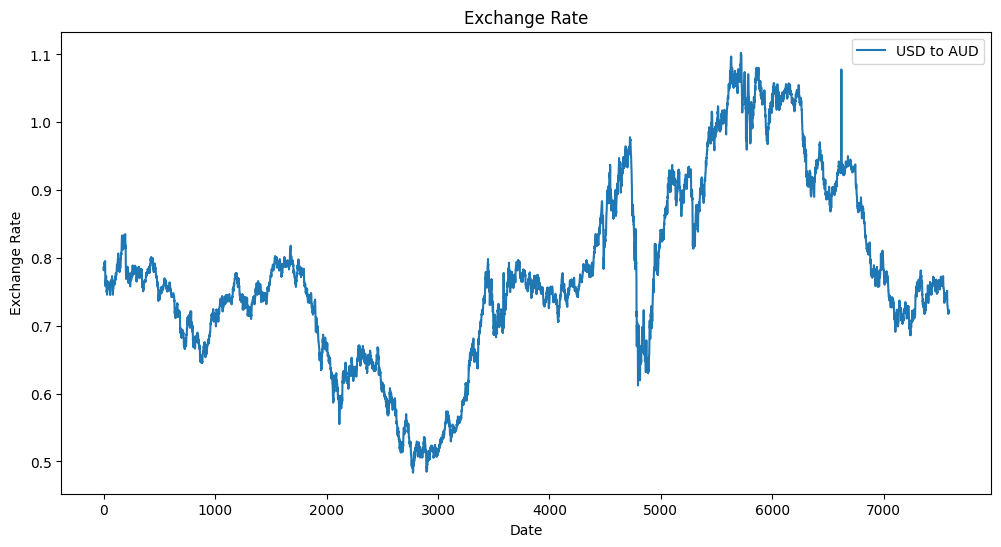

In [16]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='USD to AUD')
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [17]:
# Check for missing values
# Fill missing values if necessary
#data['Ex_rate'].fillna(method='ffill', inplace=True)
data['Ex_rate'] = data['Ex_rate'].ffill()
data

date   Ex_rate
0       1/1/1990 0:00  0.785500
1       2/1/1990 0:00  0.781800
2       3/1/1990 0:00  0.786700
3       4/1/1990 0:00  0.786000
4       5/1/1990 0:00  0.784900
...               ...       ...
7583   6/10/2010 0:00  0.718494
7584   7/10/2010 0:00  0.721839
7585   8/10/2010 0:00  0.723197
7586   9/10/2010 0:00  0.720825
7587  10/10/2010 0:00  0.720825

[7588 rows x 2 columns]

# Model building-ARIMA

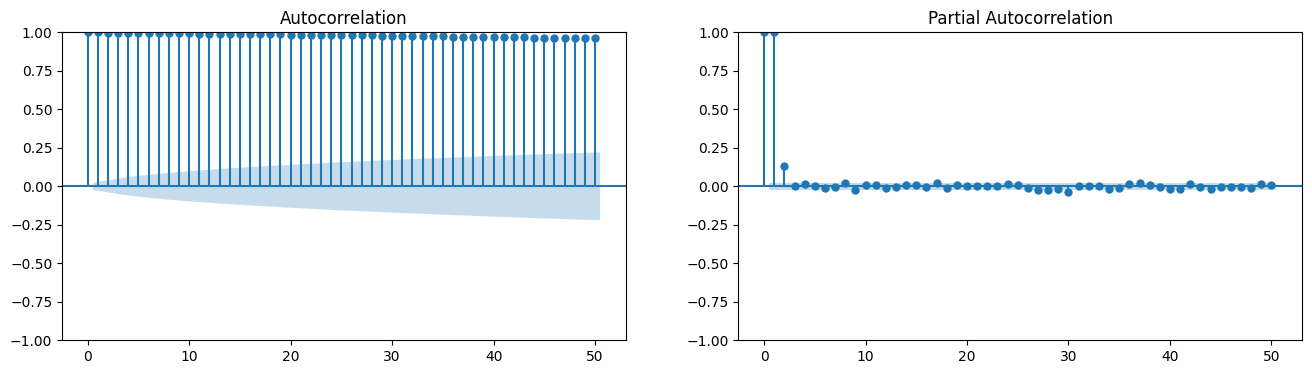

In [18]:
# Step 1: Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data['Ex_rate'], lags=50, ax=axes[0])
plot_pacf(data['Ex_rate'], lags=50, ax=axes[1])
plt.show()

In [23]:
# Step 2: Model Fitting
from statsmodels.tsa.arima.model import ARIMA
# Define the model
p, d, q = 1, 1, 1  
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()
# Summary of the model
print(arima_result.summary())  

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 14 Jul 2024   AIC                         -56102.322
Time:                        16:05:04   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

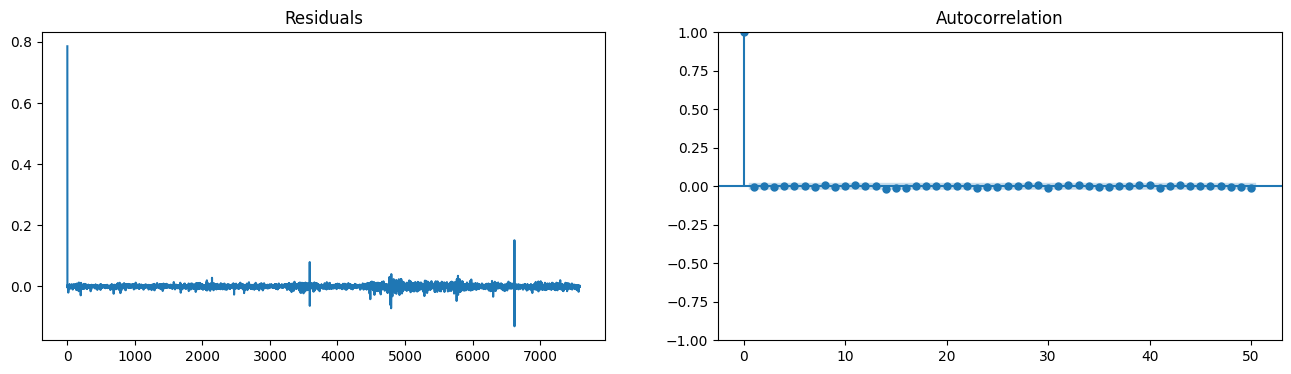

In [24]:
# Step 3: Diagnostics
# Residual diagnostics
residuals = arima_result.resid
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
plot_acf(residuals, lags=50, ax=axes[1])
plt.show()

In [25]:
# Step 4: Forecasting
# Forecasting
# Number of steps to forecast
forecast_steps = 12  
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

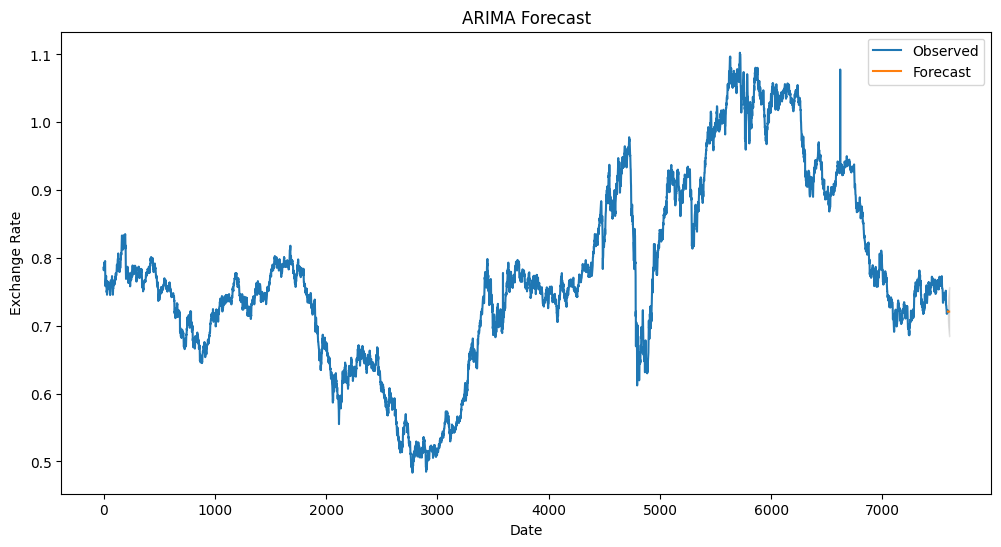

In [26]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Model building

In [27]:
# Step 1: Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Define the model (Holt-Winters Exponential Smoothing)
exp_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)
# Fit the model
exp_result = exp_model.fit()
# Summary of the model
print(exp_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.480
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Sun, 14 Jul 2024
Box-Cox:                          False   Time:                         16:07:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698356                alpha                 True
smoothing_seasonal       

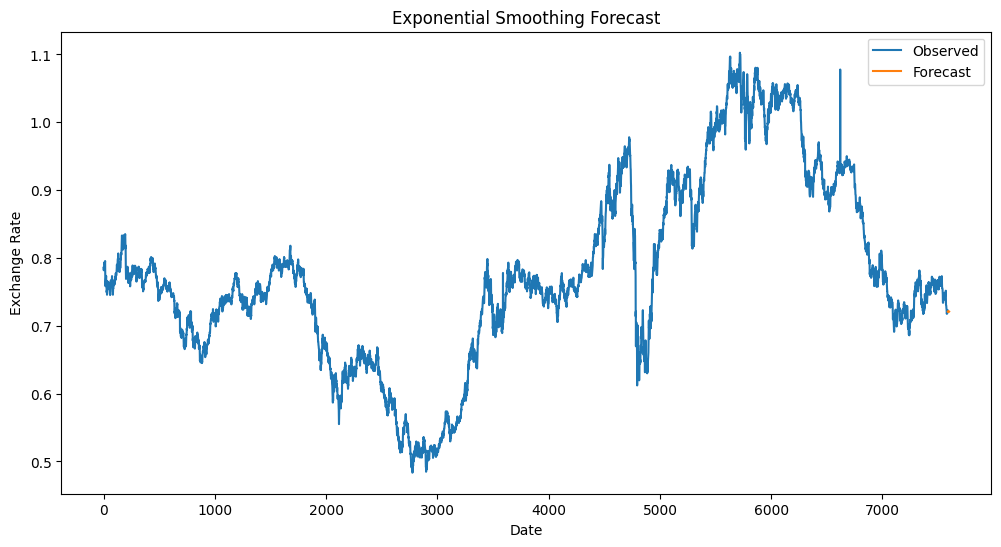

In [28]:
# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


# evaluation & comparision

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean
arima_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - arima_forecast_values) / data['Ex_rate'][-forecast_steps:])) * 100
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan%


In [30]:
# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_forecast
exp_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], exp_forecast_values)
exp_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], exp_forecast_values))
exp_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - exp_forecast_values) / data['Ex_rate'][-forecast_steps:])) * 100
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")

Exponential Smoothing MAE: 0.0015781973742896398, RMSE: 0.0018717506305405425, MAPE: nan%


In [32]:
# Based on error metrics
#we can see which model performs better

if arima_mae < exp_mae:
    print("ARIMA model performs better in terms of MAE.")
else:
    print("Exponential Smoothing model performs better in terms of MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performs better in terms of RMSE.")
else:
    print("Exponential Smoothing model performs better in terms of RMSE.")

if arima_mape < exp_mape:
    print("ARIMA model performs better in terms of MAPE.")
else:
    print("Exponential Smoothing model performs better in terms of MAPE.")


Exponential Smoothing model performs better in terms of MAE.
Exponential Smoothing model performs better in terms of RMSE.
Exponential Smoothing model performs better in terms of MAPE.
